In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
columns_labels = []
df_music_raw = pd.read_csv("./year_prediction.csv",delimiter=',')

In [3]:
df_music_raw.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


C:\Users\thiba\AppData\Local\Temp\ipykernel_18516\3011710041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_music_raw['label'], color='red')


Text(0.5, 1.0, 'Samples in the dataset/release year')

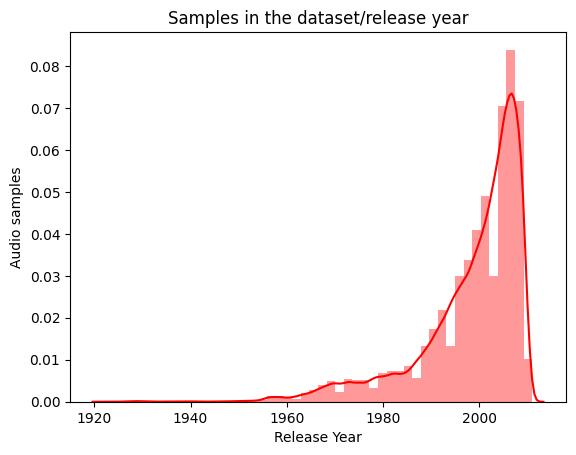

In [4]:
sns.distplot(df_music_raw['label'], color='red')
plt.xlabel("Release Year")
plt.ylabel("Audio samples")
plt.title("Samples in the dataset/release year")

In [5]:
#PC qui crashe quand on utilise le dataframe de base => utiliser moins de labels
# Conversions des années en Décennies
df_music_raw['label'] = df_music_raw.label.apply(lambda year : year-(year%10))

In [6]:
#test pour voir si la conversion a marché
df_music_raw.sample(5)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
61798,2000,43.72566,26.74829,-14.52972,-3.86226,-8.87591,15.82120,-3.18801,5.32582,-11.38180,...,-14.76924,-16.25825,-26.66821,94.62854,3.72337,178.17351,-213.44429,11.39638,-69.18361,-26.97787
224710,1990,29.45142,44.19682,-36.90856,57.78784,30.74042,27.97834,2.24274,0.24367,-1.11706,...,80.30200,-357.09842,-104.58241,-156.07459,-1.72947,-286.37009,-255.09096,37.19625,151.40715,30.00870
95218,1990,49.97790,59.15700,27.11573,-7.68333,-11.07537,-18.68859,-20.62645,3.42786,6.00962,...,0.04651,-14.14526,-3.81328,28.56592,1.96637,25.45057,28.96393,-2.29702,6.97894,0.03822
174302,2000,44.14801,-26.40530,-10.08593,-13.73893,6.37780,-5.92646,13.18224,-6.91869,10.30623,...,1.37456,17.64752,134.02192,159.53554,12.72998,80.00383,10.17531,3.45733,11.40955,11.38719
513907,2000,39.23127,-12.28631,26.08820,4.79475,-4.44614,9.59423,5.60488,-0.21894,0.81441,...,40.36732,-433.94477,-147.48852,-37.26791,-10.47822,494.81234,-47.91046,33.59408,-116.16869,-10.60869


Text(0.5, 1.0, 'Samples in the dataset/release decade')

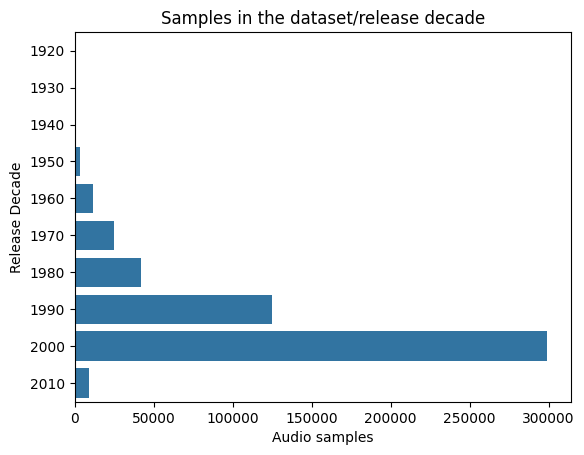

In [7]:
#Nouvelle distribution
sns.countplot(y="label", data=df_music_raw)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [8]:
#df_music_raw['label'].sum().groupby('label')

C:\Users\thiba\AppData\Local\Temp\ipykernel_18516\3556363422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_music_raw.label)


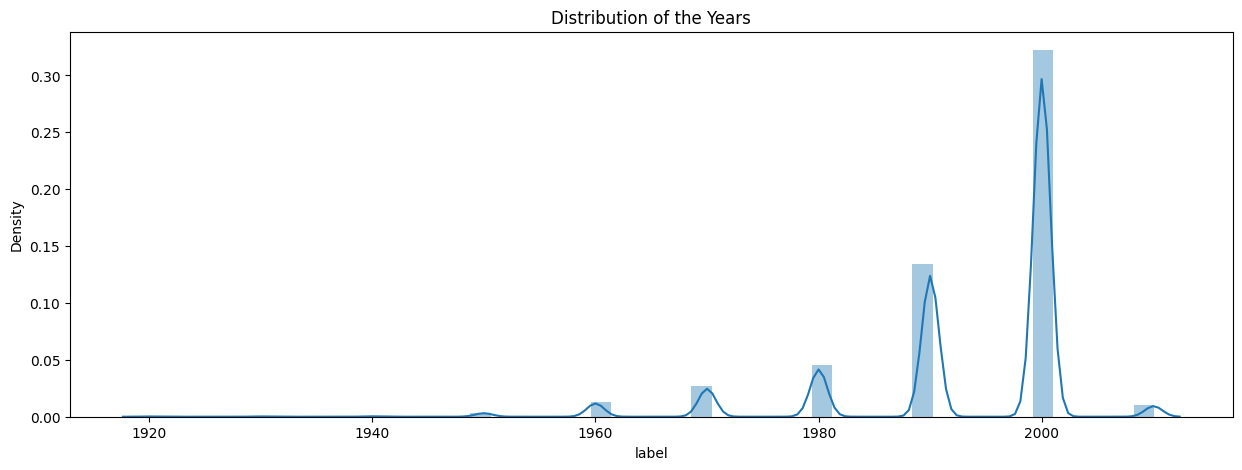

In [9]:
plt.figure(figsize=(15,5))
sns.distplot(df_music_raw.label)
plt.title('Distribution of the Years')
plt.show()

In [10]:
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC

In [11]:
#creation des ensembles
X = df_music_raw.drop('label',axis=1)
Y = df_music_raw['label']

In [12]:
Y 


0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
515340    2000
515341    2000
515342    2000
515343    2000
515344    2000
Name: label, Length: 515345, dtype: int64

In [13]:
Y

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
515340    2000
515341    2000
515342    2000
515343    2000
515344    2000
Name: label, Length: 515345, dtype: int64

As indicated in the presentation page of the dataset, we must split the data in a specific way in order to avoid " the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set." - See dataset link for more inforamtions

In [14]:
#division des sets selon l'indication sur le site du dataset explication juste au dessus
x_train = X.iloc[0:463715,:]
y_train = Y.iloc[0:463715]

x_test = X.iloc[463715:,:]
y_test = Y.iloc[463715:]

In [15]:
#utilisation d'un standard scaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)
X_train_std = pd.DataFrame(X_train_std,columns=x_train.columns)
X_test_std = pd.DataFrame(X_test_std,columns=x_train.columns)

In [16]:
#réduction du nombre de variables (de 90 à 55) en limitant la perte d'infos grace à PCA() => modèle plus rapide à charger.

from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(X_train_std)
pca.n_components_

55

In [17]:
#normalisation des valeurs nécessaire
pca = PCA(n_components=60)
X_train_proc = pca.fit_transform(X_train_std)
X_test_proc = pca.transform(X_test_std)
y_train_proc = y_train - min(y_train)
y_test_proc = y_test - min(y_test)

In [18]:
y_test.values

array([2000, 2000, 2000, ..., 2000, 2000, 2000], dtype=int64)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
rfc = RandomForestClassifier()
rfc.fit(X_train_proc, y_train_proc)
#with full data and decades label => 60%
#43 mn for a run

RandomForestClassifier()

<Axes: >

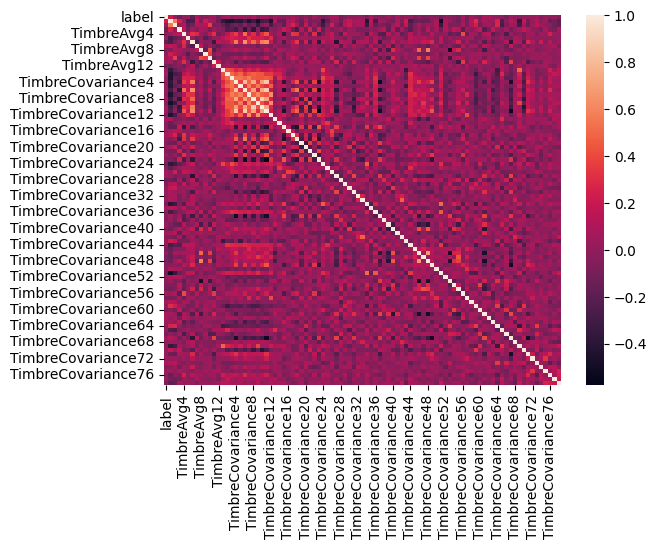

In [20]:
sns.heatmap(df_music_raw.corr())

In [21]:
y_pred = rfc.predict(X_test_proc)

In [23]:
y_pred = np.array(y_pred)

In [24]:
y_pred

array([80, 80, 80, ..., 80, 70, 80], dtype=int64)

In [25]:
y_test_proc = np.array(y_test_proc).reshape(-1,1)

In [26]:
y_pred=y_pred.reshape(-1,1)


In [27]:
rfc.score(X_test_proc,y_test_proc) #Bon score


0.594828588030215

In [31]:
mean_absolute_error(y_test_proc,y_pred)

6.480340887081154

In [34]:
def confusion_matrix_maison(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(unique_classes)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(y_true)):
        true_class_index = np.where(unique_classes == y_true[i])[0][0]
        pred_class_index = np.where(unique_classes == y_pred[i])[0][0]
        conf_matrix[true_class_index][pred_class_index] += 1

    return conf_matrix

In [35]:
conf_matrix = confusion_matrix_maison(y_test_proc, y_pred)

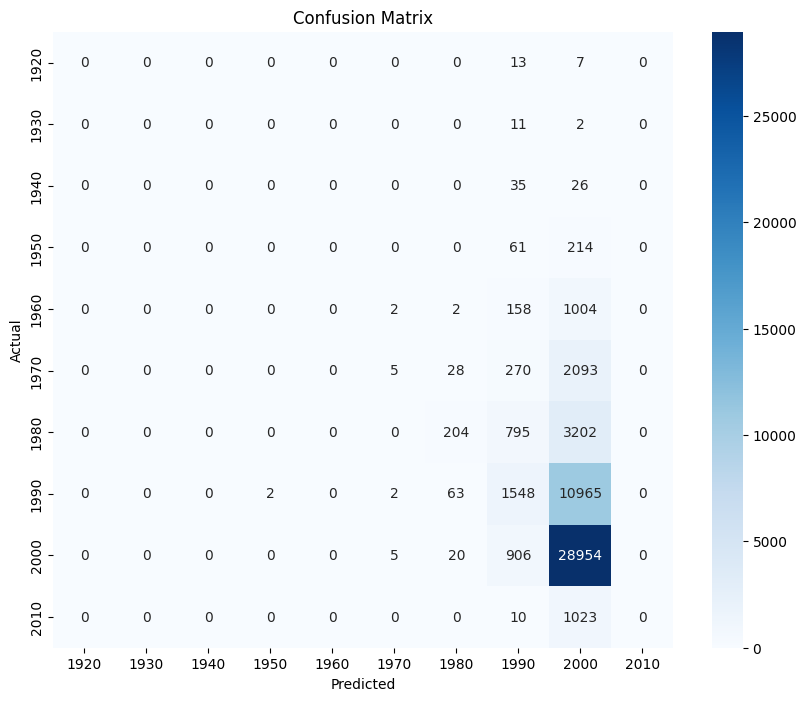

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(1920, 2011, 10), yticklabels=range(1920, 2011, 10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
rfc.get_params(deep=True)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
#test avec nouveau sets ou chaque deccennie est équitablement representée

df_low_data = df_music_raw[df_music_raw.label>1940]
min_samples = df_low_data.label.value_counts().min()
decades = df_low_data.label.unique()
df_sampled = pd.DataFrame(columns=df_low_data.columns)
for decade in decades:
    subset_df = df_low_data[df_low_data['label'] == decade].sample(min_samples)
    df_sampled = pd.concat([df_sampled, subset_df], ignore_index=True)
df_sampled.label = df_sampled.label.astype(int)

C:\Users\thiba\AppData\Local\Temp\ipykernel_18516\3503285674.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_sampled = pd.concat([df_sampled, subset_df], ignore_index=True)


,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2000,48.04583,-13.61106,30.97584,-4.49712,-2.63021,-16.32257,-11.01030,-9.87419,-4.73976,...,3.38466,-53.26972,1.79224,2.25763,16.01220,-34.17793,-97.58630,-2.93083,75.58548,-23.12451
1,2000,43.35238,-10.00471,9.56313,14.49567,37.77078,16.91711,7.27254,13.39410,-3.92336,...,0.03680,51.78487,316.95446,-6.92997,-4.90270,236.29343,9.62628,32.25255,-140.76694,7.98009
2,2000,46.36284,1.49045,28.24579,-4.44849,-2.17070,-7.53563,-12.35406,0.10872,3.31386,...,15.68785,-4.46309,25.51608,54.24356,2.99818,-119.74640,-85.57637,-2.70582,-286.87060,-12.21754
3,2000,42.70412,70.94806,-58.05881,4.89252,5.72757,-4.80067,16.50581,14.58604,15.32894,...,13.36543,152.64831,-87.42790,-159.45979,14.70347,29.88480,-105.97805,10.51992,55.55214,1.54177
4,2000,48.06625,6.36094,28.07576,-3.96060,10.31479,-13.55821,-14.00797,-3.83194,2.41059,...,12.82931,-66.36659,78.34946,8.42906,6.79799,-1.80007,42.36922,1.32523,-20.71777,0.64662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21709,1950,29.32397,11.42621,-8.02117,-2.29973,10.67579,-0.75428,-5.42075,11.17064,-4.79918,...,-31.85553,-212.96454,221.97994,85.58051,-39.25754,46.70470,-114.28677,2.55858,69.38893,33.83836
21710,1950,35.71387,-34.52925,26.80449,-2.54219,8.16496,-0.74563,-15.99321,-4.26068,14.98785,...,57.33241,-243.13957,-8.33265,3.30051,5.35181,158.66566,52.03158,-1.75864,-65.94183,5.33007
21711,1950,34.89999,-59.00914,61.61989,13.53051,8.73360,21.74725,-3.63855,13.49348,5.92765,...,47.59967,-499.04865,261.62074,111.86611,-21.11114,-3.21912,-201.99314,17.27455,-12.94913,-4.15340
21712,1950,37.49291,-56.11696,41.55810,-5.80862,-5.61397,-6.26991,-13.91933,4.24812,-3.63579,...,5.02103,-19.73345,-27.35557,17.74740,3.15368,2.02026,-219.35886,-9.32623,-309.39430,-24.73246


Text(0.5, 1.0, 'Downsampled dataset')

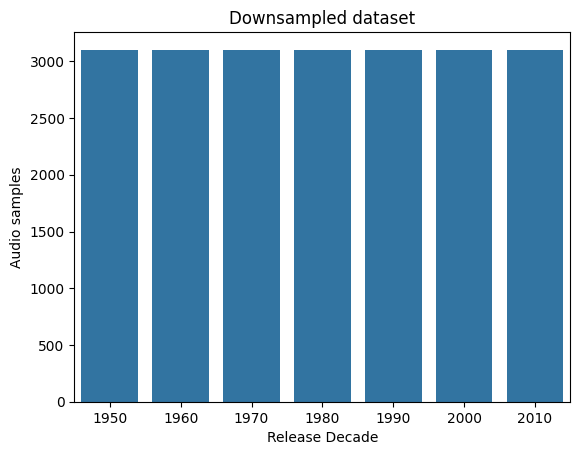

In [38]:
sns.countplot(x="label", data=df_sampled)
plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")

In [39]:
X_2 = df_sampled.iloc[:,1:].values
y_2 = df_sampled.iloc[:,0].values

In [40]:
pca = PCA(n_components=20).fit(X_2)
X_2_pca = pca.transform(X_2)

In [41]:
df_sampled = sklearn.utils.shuffle(df_sampled)
df_train, df_test = train_test_split(df_sampled, test_size=0.3)

In [42]:
X_train = df_train.iloc[:,1:].values 
y_train = df_train.iloc[:,0].values

In [43]:
clf = SVC(kernel='rbf',C=10,gamma=5)
clf.fit(X_train, y_train)

SVC(C=10, gamma=5)

In [44]:
x_2_test = df_test.iloc[:,1:].values
y_2_test = df_test.iloc[:,0].values

In [45]:
clf.score(x_2_test,y_2_test)

0.138296239447429

In [46]:
y_2_pred = clf.predict(x_2_test)
score = 0
for i in range(len(y_2_pred)):
    if y_2_pred[i] == y_2_test[i]:
        score +=1
score = score/len(y_2_test)
score

0.138296239447429

In [47]:
mean_absolute_error(y_2_test,y_2_pred)

17.227935533384496

In [64]:
conf_matrix = confusion_matrix_maison(y_2_test, y_2_pred)

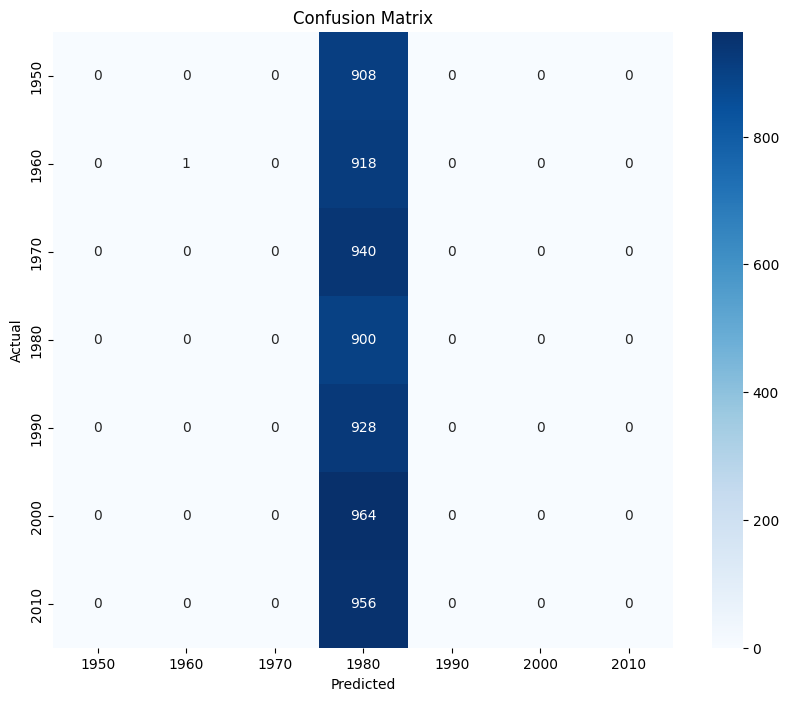

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(1950, 2011, 10), yticklabels=range(1950, 2011, 10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

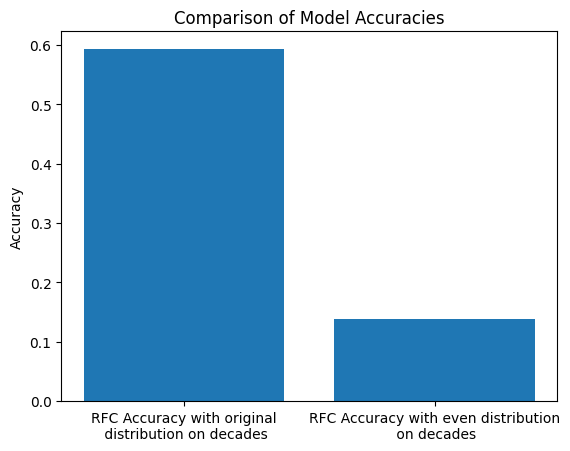

In [ ]:
import matplotlib.pyplot as plt

RFC_Accuracy = 0.5932791012976951
RFC_Accuracy_even_distrib = 0.13768227168073677

# Création d'un nuage de points pour visualiser les deux valeurs d'exactitude
plt.bar([1, 2], [RFC_Accuracy, RFC_Accuracy_even_distrib])
plt.xticks([1, 2], ['RFC Accuracy with original\n distribution on decades', 'RFC Accuracy with even distribution\n on decades'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


In [73]:
mae_rfc_1 = 6.48
mae_rfc_2 = 17.23
mae_neural_1 = 9.357
mae_neural_2 = 6.71
mae_neural_3 = 6.53
mae_linear = 6.83
mae_logistic = 7.80
mae_decision_tree = 8.80

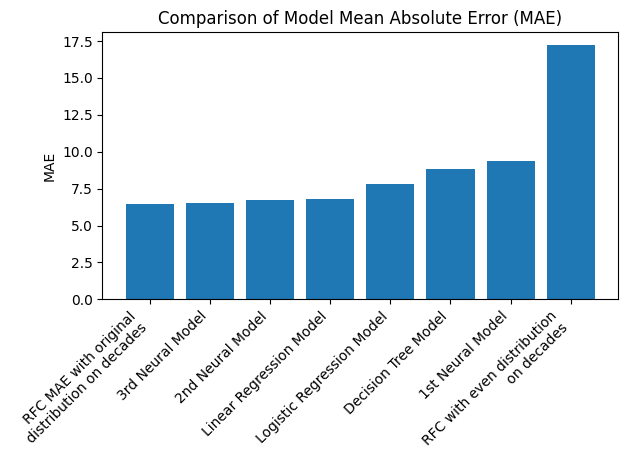

In [74]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8], [mae_rfc_1, mae_neural_3, mae_neural_2, mae_linear, mae_logistic, mae_decision_tree,mae_neural_1,mae_rfc_2])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['RFC MAE with original\n distribution on decades', 
                             '3rd Neural Model',
                             '2nd Neural Model',
                             'Linear Regression Model',
                             'Logistic Regression Model',
                             'Decision Tree Model',
                             '1st Neural Model',
                             'RFC with even distribution\n on decades'],
           rotation=45, ha='right')
plt.ylabel('MAE')
plt.title('Comparison of Model Mean Absolute Error (MAE)')
plt.tight_layout()
plt.show()

In [67]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_proc, y_train_proc)
y_pred=model.predict(X_test_proc)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.0
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2     2     0     0    12     4     0     0     0     0     0     0
      0     0     0     0]
 [    2     3     0     0     6     2     0     0     0     0     0     0
      0     0     0     0]
 [    2     8     5     0    26    20     0     0     0     0     0     0
      0     0     0     0]
 [    0     3     2     1    69   200     0     0     0     0     0     0
      0     0

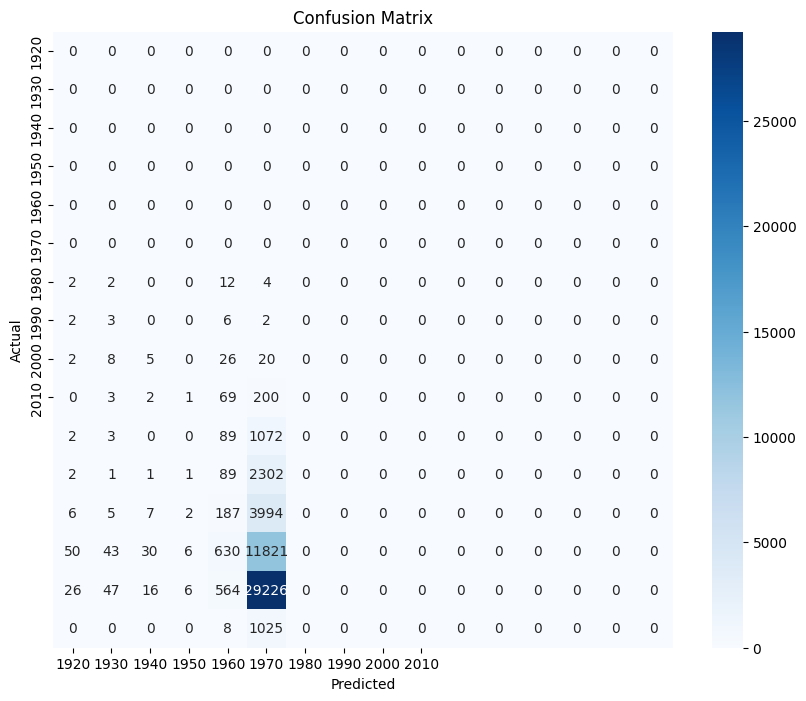

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=range(1920, 2011, 10), yticklabels=range(1920, 2011, 10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test and y_pred are your true and predicted values for a regression problem
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:",mae)

Mean Absolute Error: 1914.1650203370134
